### Importing Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Data Loading

In [2]:
# showing first 5 rows of the dataset
data = pd.read_csv("salaries.csv")
data.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45,Male,3,Manager,15.0,150000,Canada,White,1
3,36,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52,Male,2,Director,20.0,200000,USA,Asian,0


In [3]:
# showing last five rows of the dataset
data.tail(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
6679,49,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0
6680,32,Male,0,Sales Associate,3.0,50000,Australia,Australian,0
6681,30,Female,1,Financial Manager,4.0,55000,China,Chinese,0
6682,46,Male,2,Marketing Manager,14.0,140000,China,Korean,0
6683,26,Female,0,Sales Executive,1.0,35000,Canada,Black,0


### Checking the dataset

In [5]:
data.shape

(6684, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   int64  
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   int64  
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 470.1+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6684.0,33.610563,7.595994,21.0,28.0,32.0,38.0,62.0
Education Level,6684.0,1.622382,0.880474,0.0,1.0,1.0,2.0,3.0
Years of Experience,6684.0,8.077723,6.029305,0.0,3.0,7.0,12.0,34.0
Salary,6684.0,115307.175194,52806.810881,350.0,70000.0,115000.0,160000.0,250000.0
Senior,6684.0,0.143477,0.350585,0.0,0.0,0.0,0.0,1.0


In [9]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64

In [12]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race', 'Senior'],
      dtype='object')

### EDA

1. Plotting histogram

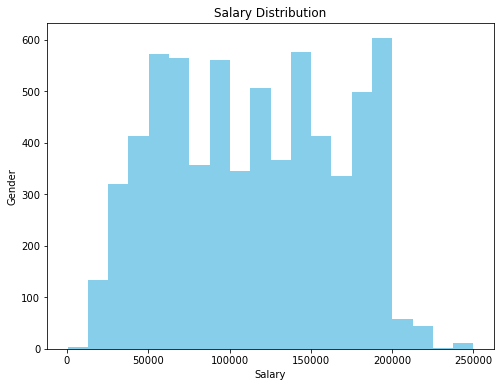

In [18]:
plt.figure(figsize=(8, 6))
plt.hist(data['Salary'], bins=20, color='skyblue')
plt.xlabel('Salary')
plt.ylabel('Gender')
plt.title('Salary Distribution')
plt.show()

2. Plotting boxplot to check outliers

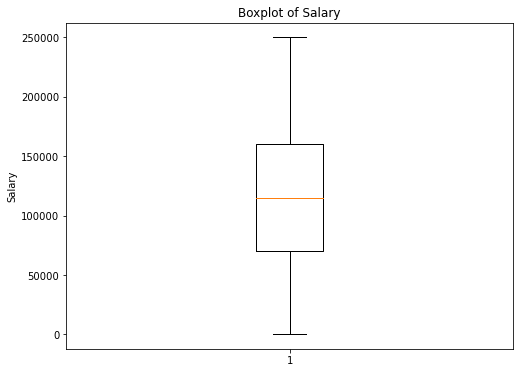

In [20]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['Salary'])
plt.ylabel('Salary')
plt.title('Boxplot of Salary')
plt.show()

3. Plotting bar graph

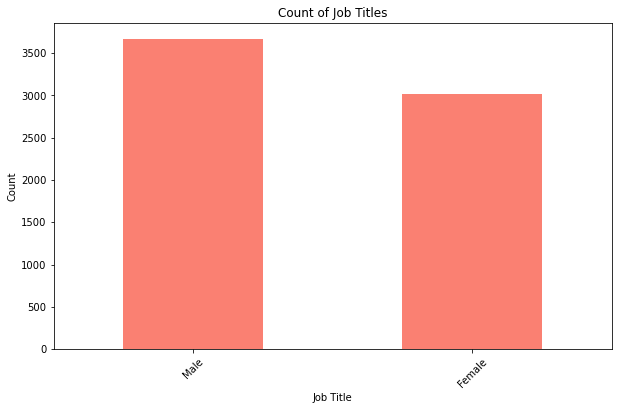

In [30]:
plt.figure(figsize=(10, 6))
data['Gender'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Count of Job Titles')
plt.xticks(rotation=45)
plt.show()

4. Plotting Scatter plot

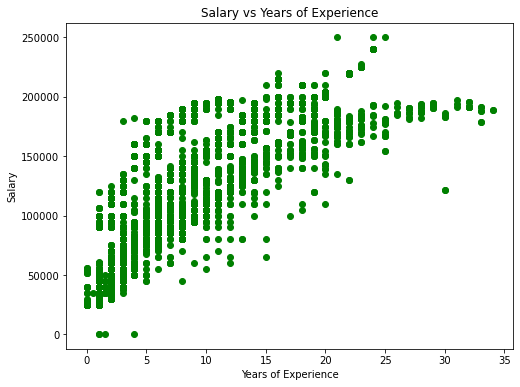

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Years of Experience'], data['Salary'], color='green')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.show()

5. Correlation matrix

In [28]:
correlation_matrix = data.corr()
print(correlation_matrix)

                          Age  Education Level  Years of Experience    Salary  \
Age                  1.000000         0.596380             0.937609  0.728343   
Education Level      0.596380         1.000000             0.613165  0.645444   
Years of Experience  0.937609         0.613165             1.000000  0.810942   
Salary               0.728343         0.645444             0.810942  1.000000   
Senior               0.334070         0.273466             0.317877  0.223636   

                       Senior  
Age                  0.334070  
Education Level      0.273466  
Years of Experience  0.317877  
Salary               0.223636  
Senior               1.000000  


<AxesSubplot:>

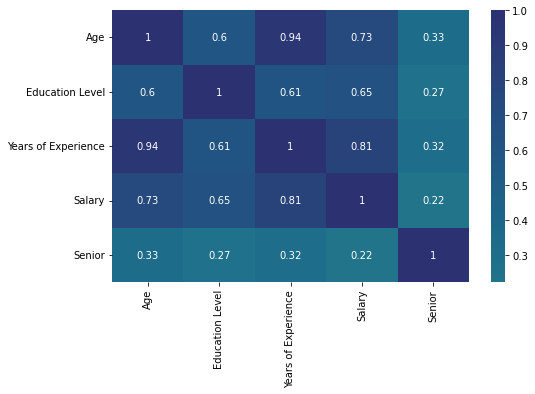

In [37]:
corr_matrix=data.corr()
plt.figure(1, figsize=(8,5))
sns.heatmap(corr_matrix, cmap='crest', center=0, annot=True)

### Machine Learning (Linear Regression)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45,Male,3,Manager,15.0,150000,Canada,White,1
3,36,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52,Male,2,Director,20.0,200000,USA,Asian,0


In [45]:
X = data['Years of Experience'].values.reshape(-1, 1)  
y = data['Salary']

In [46]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)

In [49]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [7125.59201509]
Intercept: 57856.98983306013


In [54]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 953178393.9509805
R^2 Score: 0.6569957598030858


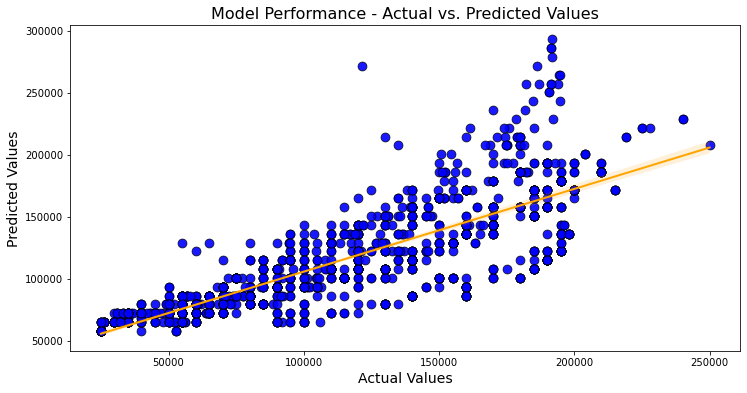

In [60]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, color='b', alpha=0.9, edgecolor='k', s=80)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='r', line_kws={"color": "orange", "lw": 2})

plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Model Performance - Actual vs. Predicted Values", fontsize=16)

plt.show()